In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('data\\50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


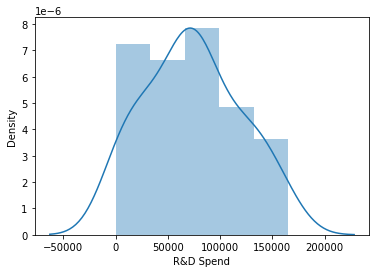

In [9]:
sns.distplot(df['R&D Spend'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


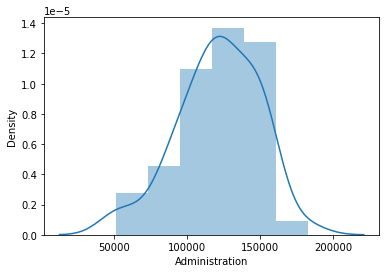

In [10]:
sns.distplot(df['Administration'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


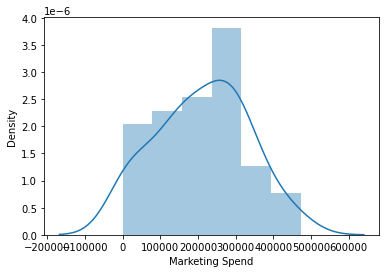

In [11]:
sns.distplot(df['Marketing Spend'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


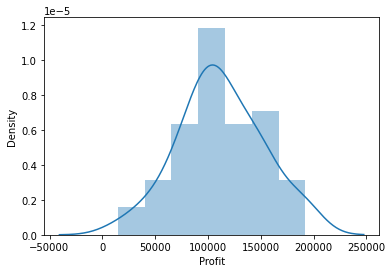

In [12]:
sns.distplot(df['Profit'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


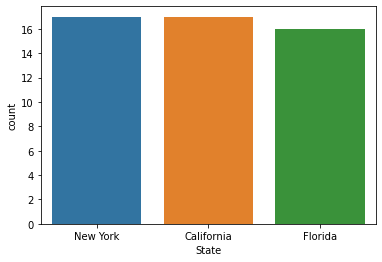

In [13]:
sns.countplot(df['State'])
plt.show()

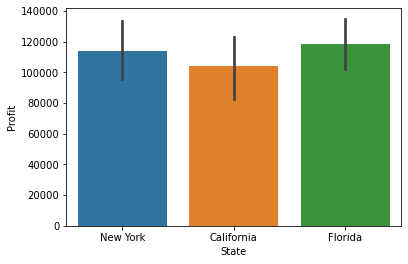

In [14]:
sns.barplot(x=df['State'],y=df['Profit'])
plt.show()

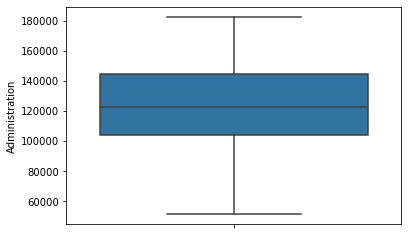

In [15]:
sns.boxplot(y=df['Administration'])
plt.show()

In [16]:
dummy_df = pd.get_dummies(df,drop_first=True)
dummy_df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [17]:
from sklearn.model_selection import train_test_split
X = dummy_df.copy()
y = X.pop('Profit')

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=9)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.fit_transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train_scaled,y_train)

LinearRegression()

In [21]:
from sklearn import metrics

def print_evaluation(actual,pred):
    mae = metrics.mean_absolute_error(actual,pred)
    mse = metrics.mean_squared_error(actual,pred)
    rmse = np.sqrt(metrics.mean_squared_error(actual,pred))
    r2 = metrics.r2_score(actual,pred)*100
    
    print('MAE :',mae)
    print('MSE :',mse)
    print('RMSE :',rmse)
    print('R2 :',r2)

test_pred = reg.predict(x_test_scaled)
train_pred = reg.predict(x_train_scaled)

print('Test set evaluation : ')
print_evaluation(y_test,test_pred)
print('\n')
print('Train set evaluation : ')
print_evaluation(y_train,train_pred)

Test set evaluation : 
MAE : 10339.756014125467
MSE : 161752560.1952223
RMSE : 12718.197993238755
R2 : 87.89434890306464


Train set evaluation : 
MAE : 6222.0492620482755
MSE : 68704304.83391473
RMSE : 8288.805995673607
R2 : 95.9441388437321


In [22]:
actual_pred = pd.DataFrame()
actual_pred['Actual'] = y_test

actual_pred['Predicted'] = test_pred
actual_pred

,Actual,Predicted
21,111313.02,111790.197656
37,89949.14,78513.169148
2,191050.39,180984.147491
14,132602.65,150949.581217
44,65200.33,59561.439426
7,155752.60,160821.617416
15,129917.04,141114.378688
20,118474.03,110024.402725
32,97427.84,94520.055010
25,107404.34,97710.445271


In [23]:
# import joblib

In [24]:
# joblib.dump(reg,'model_joblib')

In [25]:
# mj = joblib.load('model_joblib')

NameError: name 'joblib' is not defined

In [ ]:
# inp = scaler.fit_transform([[2424,4434,43434,0,0]])
# ans = mj.predict(inp)
# scaler.inverse_transform(ans)

In [27]:
import pickle

pickle.dump(reg,open('profitpred.pkl','wb'))